## (SURPRISE HOUSING) Price Prediction - Advance Regression (Ridge and Lasso)
------------------------------------------------------------------------------------------

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
 - **Which variables are significant in predicting the price of a house.**
 - **How well those variables describe the price of a house.**
 
### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Steps followed to build the Model :

  - Data understanding and exploration
  - Data cleaning
  - Data preprocessing
  - Model building and evaluation
  - Observation and inference
  
# Step 1 : Data Understanding and Exploration 

### Importing All necessary libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_csv('train.csv', encoding = 'utf-8')

In [3]:
pd.set_option('display.max_rows', None,'display.max_columns',None)
display(housing.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### For understanding the data, we check through different methods.

### We have total : 
  
  - **1460** records 
  - **81** features

In [4]:
housing.shape

(1460, 81)

### Checking for other information like :
  
  - Name of the features
  - Datatypes for each feature (column)
  - Number of records for each feature

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Describe the Housing dataset to check different metrics like 
   - 25%, 50%, 75%, min , max, std, count, mean

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### As per Housing info :
  - We have unequal count for each columns due to missing values
  - So we check those columns having missing values
  - First we check for **Object** datatype
       - There are some columns have more than 80% missing values
       - We need to take some decision on these missing values
       
### We are unable to see the null values in variables due to excess variables, 

### So create the dataframe with for each variables with null values and percentage of null values.

In [7]:
null_val = (housing.isnull().sum()/len(housing))*100

null_var = pd.DataFrame( {'var_name' : housing.columns,
                         'null_values' : housing.isnull().sum(),
                        'Percentage_null_values': null_val})

null_var = null_var[null_var['null_values'] > 0]

# sorting values on the basis of null values present i dataset
null_var.sort_values(by = 'null_values', ascending = False)

,var_name,null_values,Percentage_null_values
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
FireplaceQu,FireplaceQu,690,47.260274
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945
GarageQual,GarageQual,81,5.547945


### Plotting a bar graph for missing values

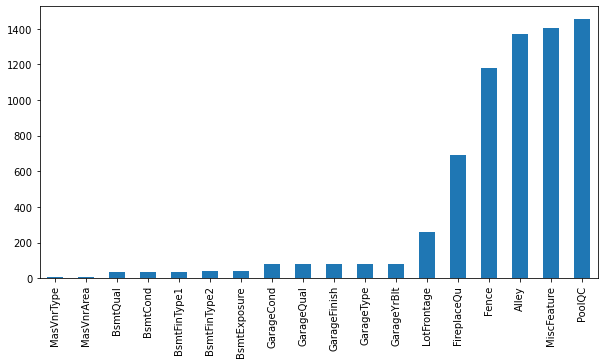

In [8]:
nan_val = housing.isnull().sum()
nan_val = nan_val[nan_val>1]
nan_val.sort_values(inplace=True)
plt.figure(figsize=(10,5))
nan_val.plot.bar()
plt.show()

### Outlier Check

#### Checking for outlier in the numerical columns

  - Most of the coloumns having outliers which need to be addressed.

In [9]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

# Step 2 : Data Cleaning

### Droping columns with NaN values more than 80%

In [10]:
print('Features having NaN values more than 80%')
print('*'*50)
for feature in housing.columns:
    if ((housing[feature].isnull().sum()/housing.shape[0])*100) >= 80:
        print(feature)
        housing.drop(feature, axis = 1, inplace= True)
print('*'*50)

Features having NaN values more than 80%
**************************************************
Alley
PoolQC
Fence
MiscFeature
**************************************************


### Now there are NaN values for Object datatype, so we need to replace these NaN values with 'Missing'

In [11]:
def replace_cat_feature(housing):
    for feature in housing.columns:
        if (housing[feature].isnull().sum() > 0) and (housing[feature].dtypes == 'O'):
            housing[feature].fillna('Missing')
    return housing

housing=replace_cat_feature(housing)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### Now lets check for numerical features contains missing values
  - We will print the numerical features with percentage of missing values

In [12]:
feature_num_NA = [features for features in housing.columns if housing[features].isnull().sum()>0
             and housing[features].dtypes != 'O']

for feature in feature_num_NA:
    print(feature, np.round(housing[feature].isnull().mean(),4),' % missing values')

LotFrontage 0.1774  % missing values
MasVnrArea 0.0055  % missing values
GarageYrBlt 0.0555  % missing values


### Lets check these three features one by one using describe() method :

### As we can see for :
  - **LotFrontage** and **MasVnrArea** have outliers so better to replace NaN with median().
  - **GarageYrBlt** also we can replace with median()

In [13]:
print('LotFrontage : ')
print('*************')
print(housing['LotFrontage'].describe())
print('\n')
print('MasVnrArea : ')
print('*************')
print(housing['MasVnrArea'].describe())
print('\n')
print('GarageYrBlt : ')
print('*************')
print(housing['GarageYrBlt'].describe())

LotFrontage : 
*************
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


MasVnrArea : 
*************
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


GarageYrBlt : 
*************
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


### To crosscheck after imputing numeric nan values

In [14]:
for feature in feature_num_NA:
    median_val = housing[feature].median()
    housing[feature].fillna(median_val, inplace=True)

housing[feature_num_NA].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [15]:
print('LotFrontage : ')
print('*************')
print(housing['LotFrontage'].describe())
print('\n')
print('MasVnrArea : ')
print('*************')
print(housing['MasVnrArea'].describe())
print('\n')
print('GarageYrBlt : ')
print('*************')
print(housing['GarageYrBlt'].describe())

LotFrontage : 
*************
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


MasVnrArea : 
*************
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


GarageYrBlt : 
*************
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


### We have two types of data :
   1. Categorical Features
   2. Numerical Features
       - Discrete Features
       - Continuous Features

### Lets explore each one by one :

### 1. Categorical Features

In [16]:
cat_features=[feature for feature in housing.columns if housing[feature].dtypes=='O']
housing[cat_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


###  Find out relationship between Some of the Categorical Features with Dependent Feature SalePrice

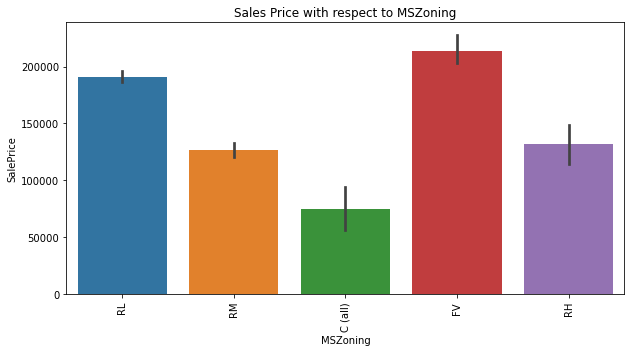

In [17]:
# Sales Price with respect to MSZoning

plt.figure(figsize=(10, 5))
sns.barplot(x="MSZoning", y="SalePrice", data= housing)
plt.title("Sales Price with respect to MSZoning")
plt.xticks(rotation=90)
plt.show()

### Observation :
  - **Floating Village Residential** (FV) and **Residential Low Density** (RL) Zones having high Sale Price

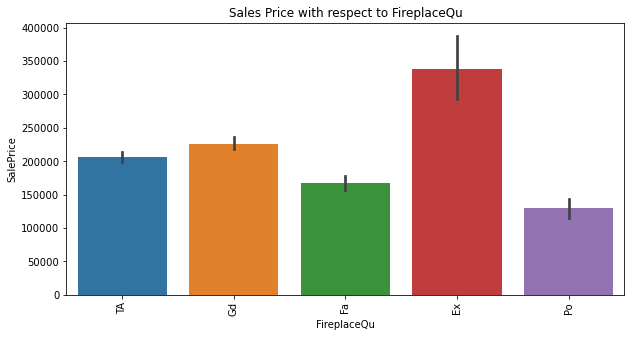

In [18]:
# Sales Price with respect to FireplaceQu
plt.figure(figsize=(10, 5))
sns.barplot(x="FireplaceQu", y="SalePrice", data= housing)
plt.title("Sales Price with respect to FireplaceQu")
plt.xticks(rotation=90)
plt.show()

### Observation :
  - Houses with Excellent (Ex) Fire place quality having high Sale Price
  - Other than this prices are approximately same for (Average, Fair and Good)
  - For Poor quality Sale price is very less as compare to other.

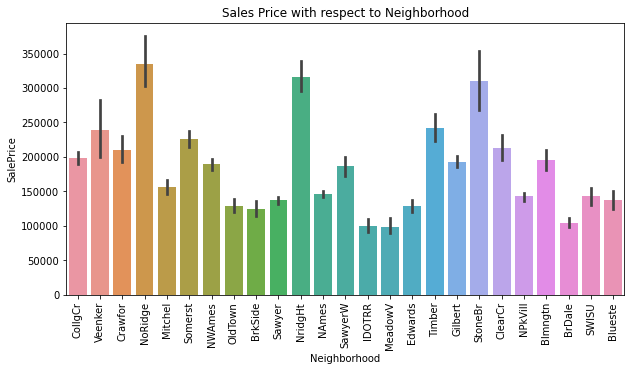

In [19]:
# Sales Price with respect to Neighborhood
plt.figure(figsize=(10, 5))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Neighborhood")
plt.xticks(rotation=90)
plt.show()

### Observation :
  - For most of the Neighborhood Sale price is high ( NoRidge,NridgHt,StoneBr having higher than others )
  - There are very number for which price is low

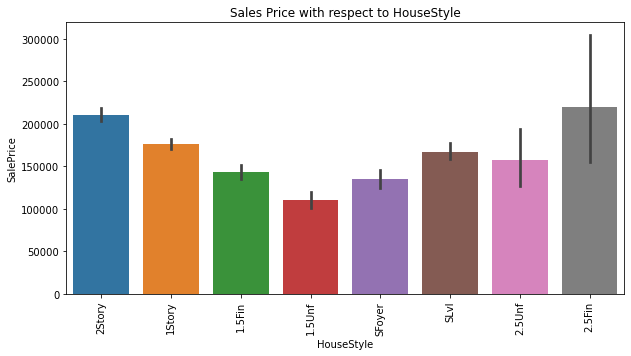

In [20]:
# Sales Price with respect to HouseStyle
plt.figure(figsize=(10, 5))
sns.barplot(x="HouseStyle", y="SalePrice", data= housing)
plt.title("Sales Price with respect to HouseStyle")
plt.xticks(rotation=90)
plt.show()

### Observation :
  - We can see **V shape** pattern in the above graph
  - As we move from Left to Right Sale Price decreases and from one point (1.5Unf) it increases

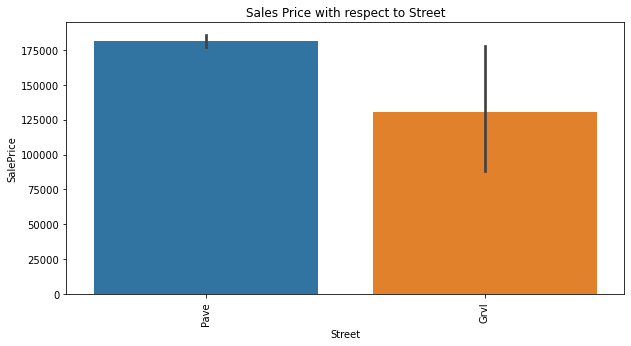

In [21]:
# Sales Price with respect to Street
plt.figure(figsize=(10, 5))
sns.barplot(x="Street", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Street")
plt.xticks(rotation=90)
plt.show()

### Observation :
  - Paved Type of road having chances for high sale price for house property  

### Checking for target Variable "SalePrice"

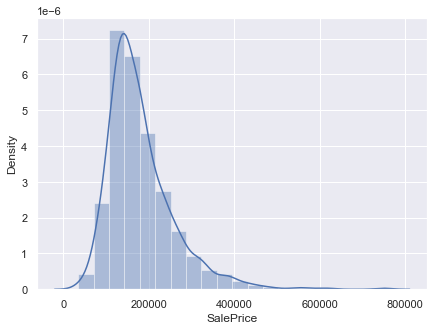

In [22]:
sns.set(rc={'figure.figsize':(12,8)})
plt.figure(figsize=(7,5))
sns.distplot(housing['SalePrice'],bins=20)
plt.show()

### As Saleprice figures are skewed towards right, we apply the log transformation to obtain a centralized data.

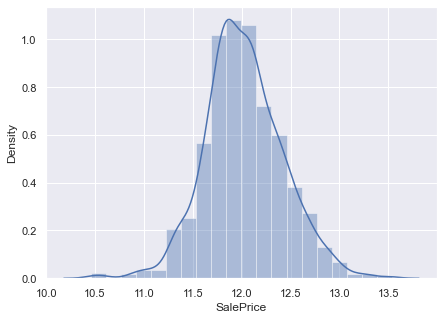

In [23]:
housing['SalePrice'] = np.log(housing['SalePrice'])
plt.figure(figsize=(7,5))
sns.distplot(housing['SalePrice'],bins=20)
plt.show()

### 2. Numerical Features

In [24]:
numeric_features = housing.select_dtypes(include=['float64','int64'])
numeric_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216


### Lets drop the ID column as not much significance for SalePrice.

  - Dropping **Id** column

In [25]:
housing.drop(['Id'], axis = 1, inplace = True)

### For Numerical Features we can have :
  - **Correlation matrix**, which tells how features are correlated to each other
  - Mostly with dependent variable
  
### Understanding pattern in numerical data with respect to predictor variable [SalePrice]

In [26]:
numeric_features = numeric_features.drop(['Id'],axis=1)
corr_mat = numeric_features.corr()
corr_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.335292
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426775
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


### We have a better way to see the correlation between columns

### Heatmap : plotting Correlations on heatmap

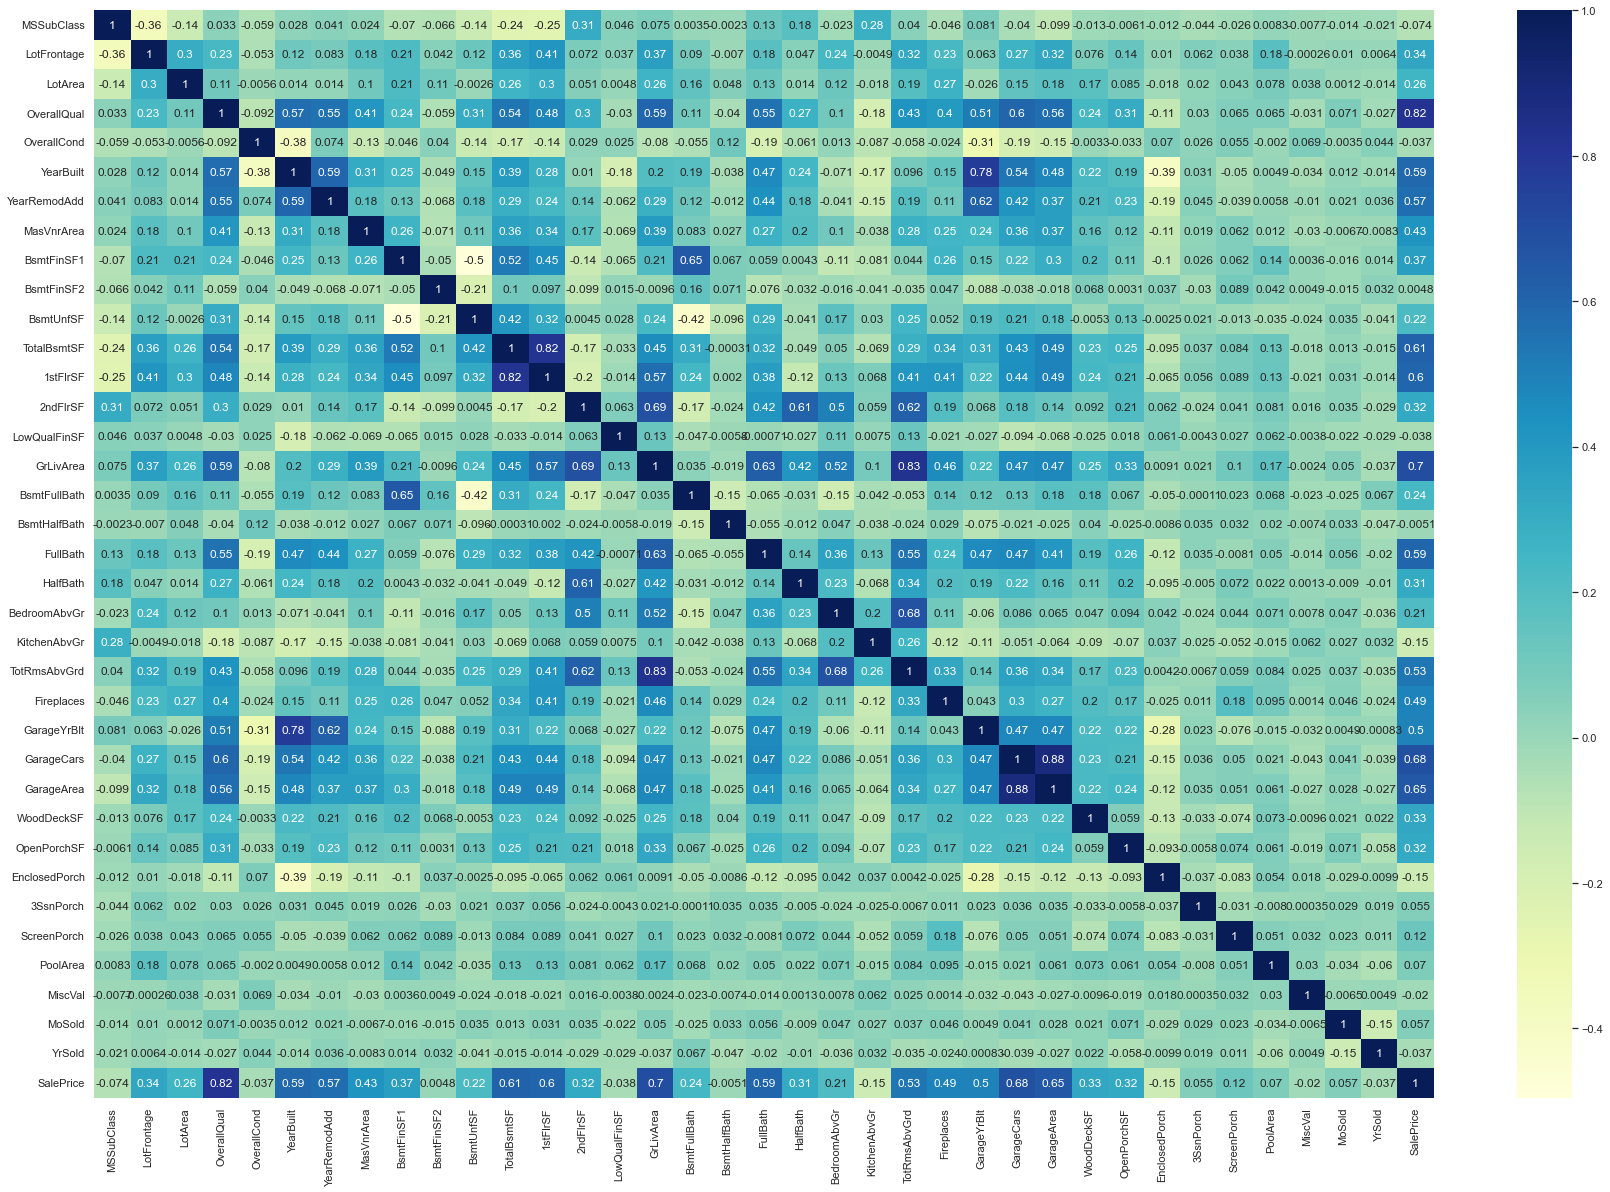

In [27]:
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat, cmap="YlGnBu", annot=True)
plt.show()

### We can see that some of the variables are correlated to each other.

### Before dropping these columns, we will first check their predictive power
  - Checking the same with a pairplot 

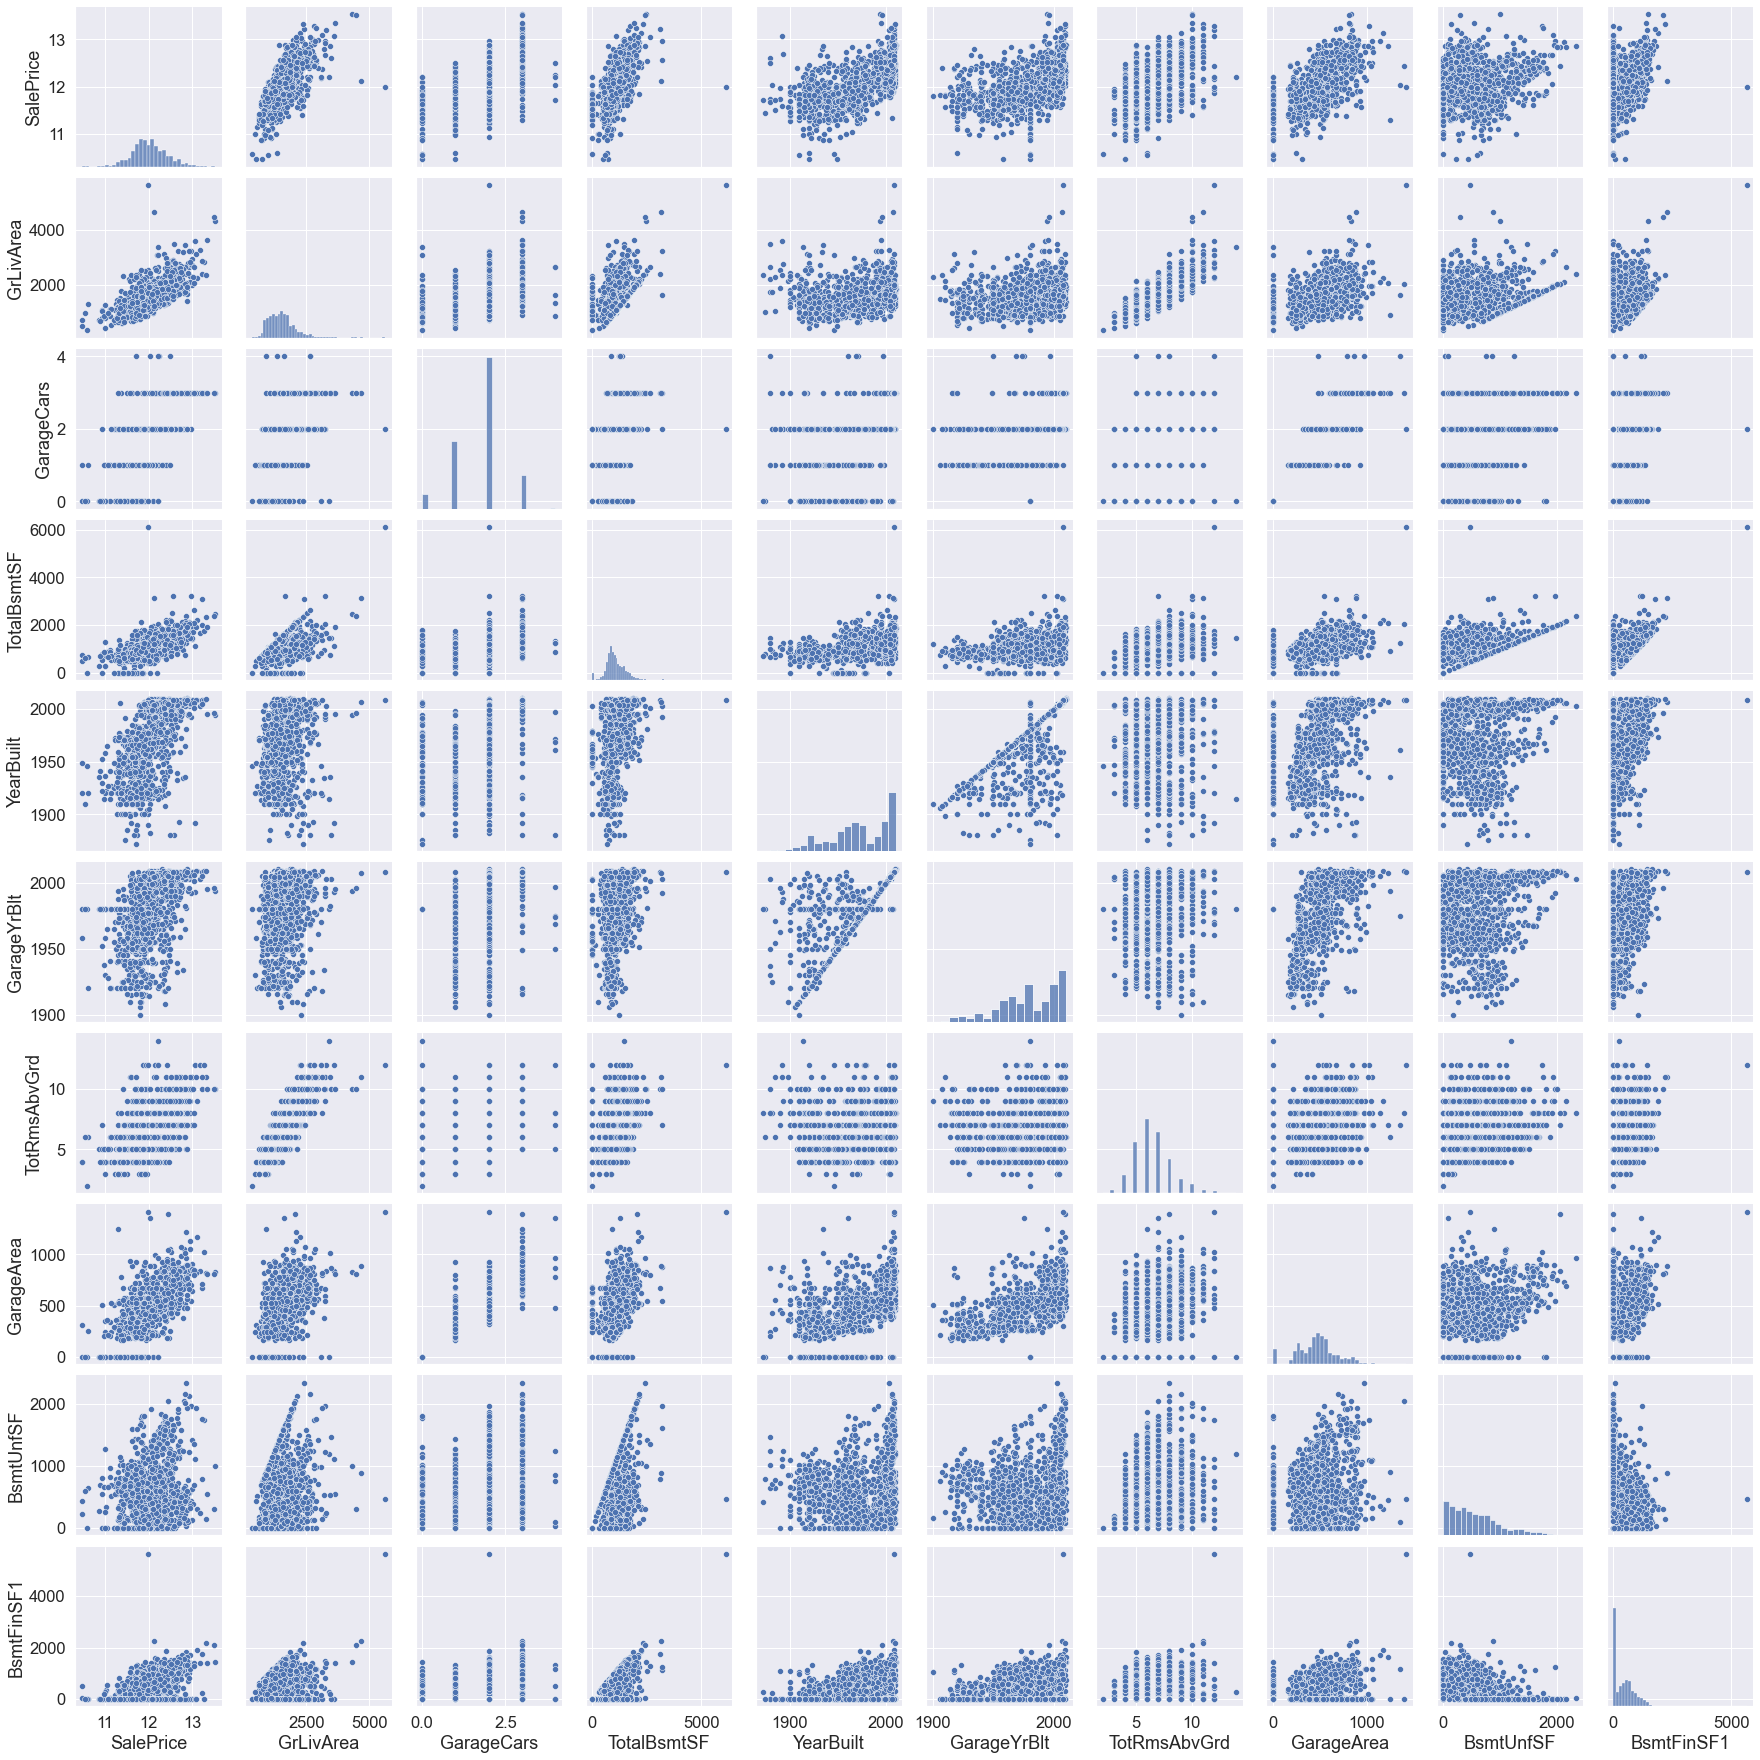

In [28]:
sns.set(font_scale=1.5)
cols = ['SalePrice', 'GrLivArea', 'GarageCars','TotalBsmtSF','YearBuilt','GarageYrBlt','TotRmsAbvGrd',
        'GarageArea','BsmtUnfSF','BsmtFinSF1']
sns.pairplot(housing[cols], size = 2.5)
plt.show()

## Multicollinearity
There are some features which are correlated to other features as we can see through the heatmap so we need to remove those features:

 1. GarageArea <-> GarageCars
 2. TotRmsAbvGrd <-> GrLivArea
 3. GarageYrBlt <-> GarageArea and GarageCars
 
**BsmtUnfSF** is not contributing much to the target variable that is **SalePrice**

In [29]:
housing.drop(['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'], axis = 1, inplace = True)

## Datetime Variables
From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. From the housing data we can get **difference** in years between **the year the house was built** and **the year the house was sold**. We can derive a column for **'AgeOfProperty'** when it was sold.

### We can derive a new feature from these Datetime variables that is "Age of the Property"

In [30]:
housing['AgeOfProperty'] = housing['YrSold'] - housing['YearBuilt']
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeOfProperty
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,8


### Check relationship between AgeOfProperty and SalePrice, how it behaves :

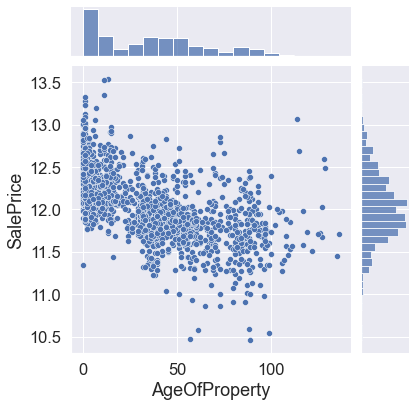

In [31]:
# AgeOfProperty vs SalePrice
sns.jointplot(x=housing['AgeOfProperty'], y=housing['SalePrice'], data=housing)
plt.show()

### Observation :
  - Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value
  
### Now we can drop all these datetime features as we have now new derive feature 'AgeOfProperty'

In [32]:
datetime_cols = ['YrSold','YearBuilt','MoSold','YearRemodAdd']
housing.drop(datetime_cols, axis=1, inplace=True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,AgeOfProperty
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,0,WD,Normal,12.247694,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,12.109011,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,12.317167,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,11.849398,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,12.429216,8


### Numerical variables are usually of 2 type
   - **Continous variable**
   - **Discrete Variables**
   
### 1. Discrete Variable

In [33]:
discrete_feature = [feature for feature in housing.columns if len(housing[feature].unique())<25 
                    and housing[feature].dtypes in ('float64','int64') and feature not in ['AgeOfProperty']]
housing[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,3SsnPorch,PoolArea,MiscVal
0,60,7,5,0,1,0,2,1,3,1,0,0,0,0
1,20,6,8,0,0,1,2,0,3,1,1,0,0,0
2,60,7,5,0,1,0,2,1,3,1,1,0,0,0
3,70,7,5,0,1,0,1,0,3,1,1,0,0,0
4,60,8,5,0,1,0,2,1,4,1,1,0,0,0


### Lets Find the realtionship between these discrete features and SalePrice

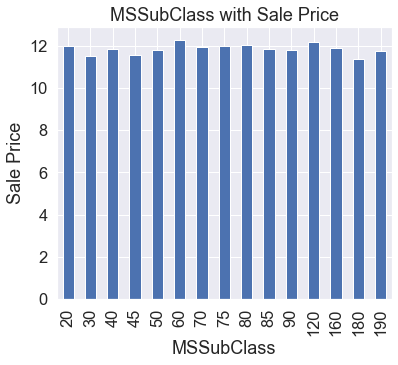

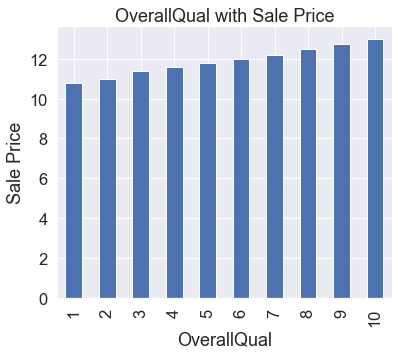

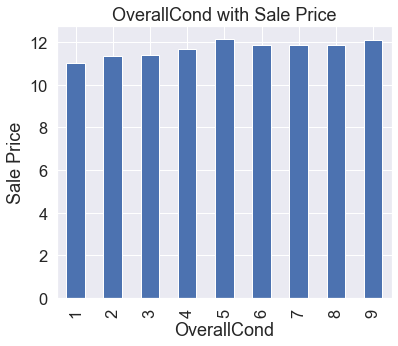

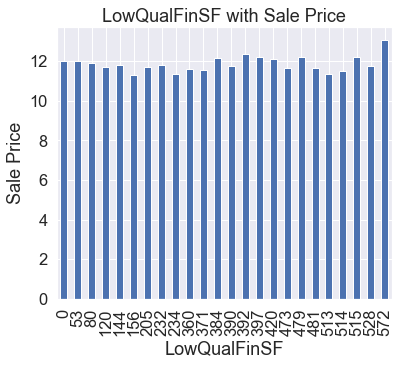

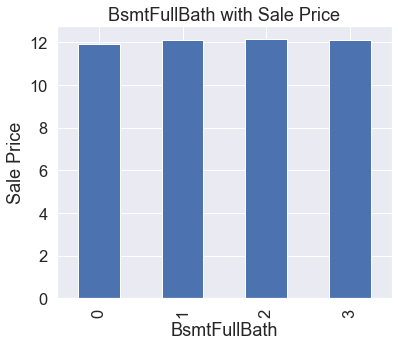

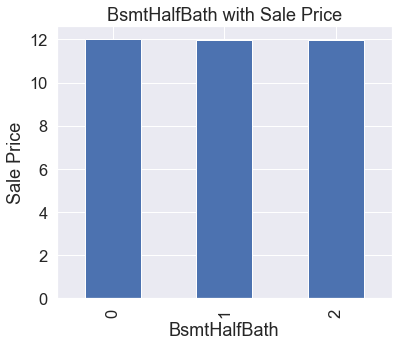

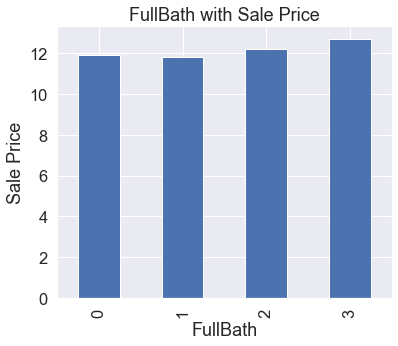

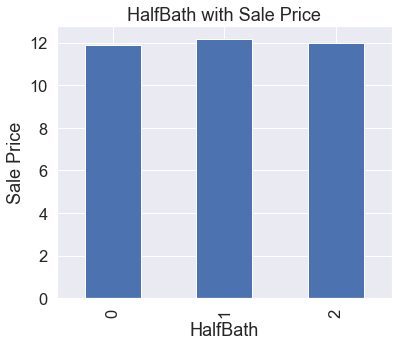

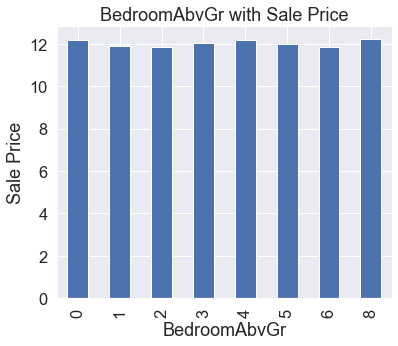

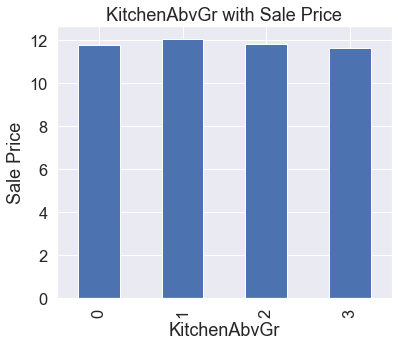

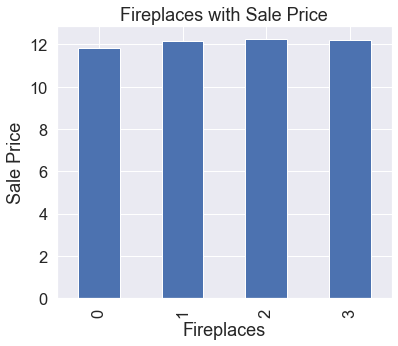

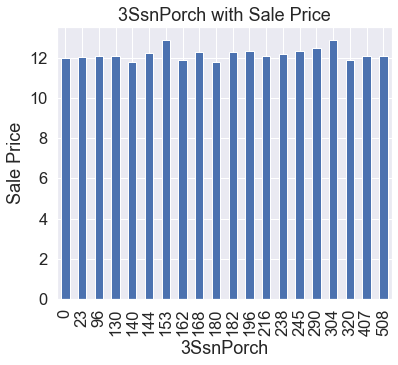

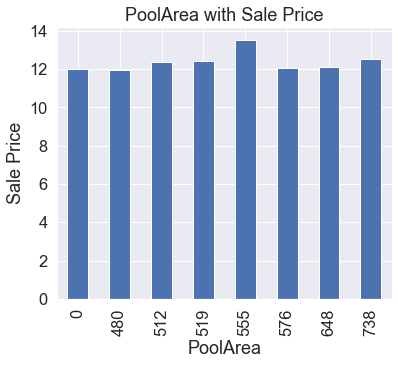

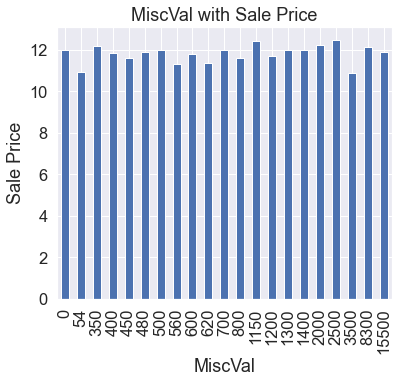

In [34]:
for feature in discrete_feature:
    plt.figure(figsize=(6,5))
    housing.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature+' with Sale Price')
    plt.show()

### Observation :
  - Except OverAllQuality we are not able to get any insight from features, they don't show any pattern.
  - Increase in **OverAllQuality** from 1 to 10 shows a increasing saleprice trend i.e **higher the OverAllQuality, high is the SalePrice** 
  

### 2. Continuous Variable

In [35]:
continuous_feature = [feature for feature in housing.columns if housing[feature].dtypes in ('float64','int64') 
                      and feature not in discrete_feature+['AgeOfProperty']]
housing[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,1710,548,0,61,0,0,12.247694
1,80.0,9600,0.0,978,0,1262,1262,0,1262,460,298,0,0,0,12.109011
2,68.0,11250,162.0,486,0,920,920,866,1786,608,0,42,0,0,12.317167
3,60.0,9550,0.0,216,0,756,961,756,1717,642,0,35,272,0,11.849398
4,84.0,14260,350.0,655,0,1145,1145,1053,2198,836,192,84,0,0,12.429216


### Plotting logarithmic transformation for Continuous Features with SalePrice
  - We will consider only those variables which doesn't have 0 as value

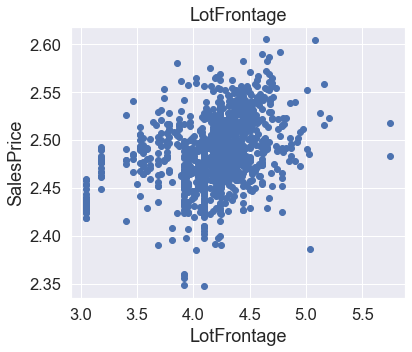

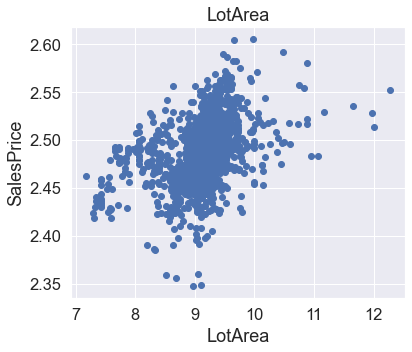

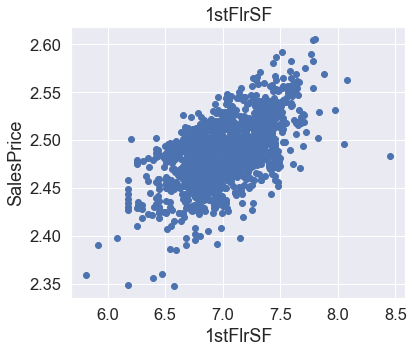

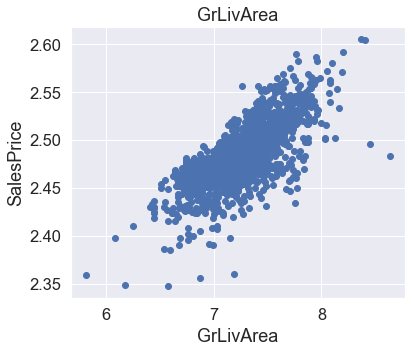

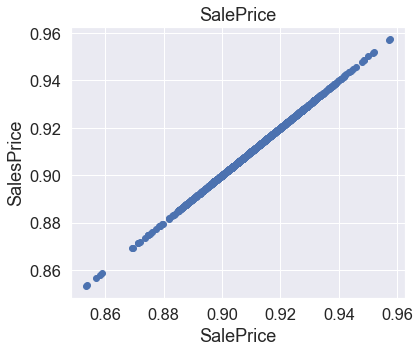

In [36]:
for feature in continuous_feature:
    house_data=housing.copy()
    if 0 in house_data[feature].unique():
        pass
    else:
        house_data[feature]=np.log(house_data[feature])
        house_data['SalePrice']=np.log(house_data['SalePrice'])
        plt.figure(figsize=(6,5))
        plt.scatter(house_data[feature],house_data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

### Observation :
  - Mostly having increasing pattern with saleprice, as feature value increasing saleprice is also increasing

### There are some features having outliers. So :
   - We need to be addresse those outliers
   - But as we don't have much data so we can't remove all
  
### Lets check some of the features

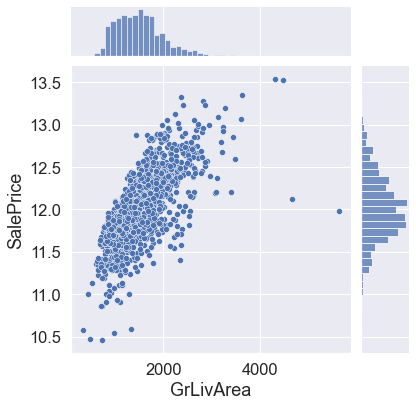

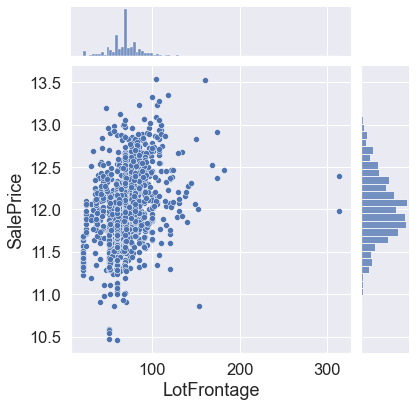

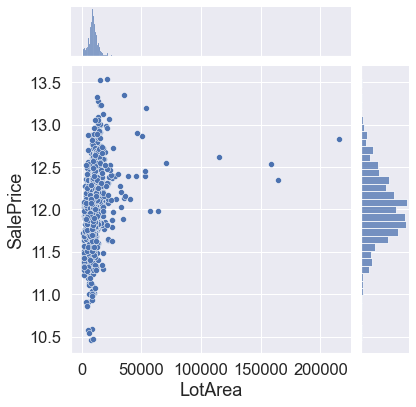

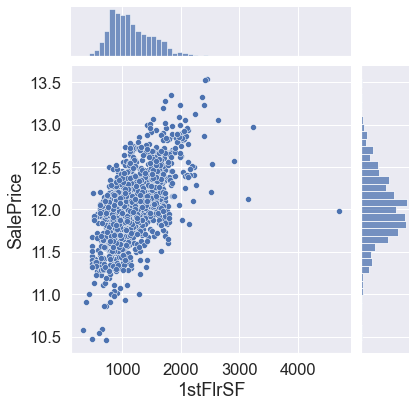

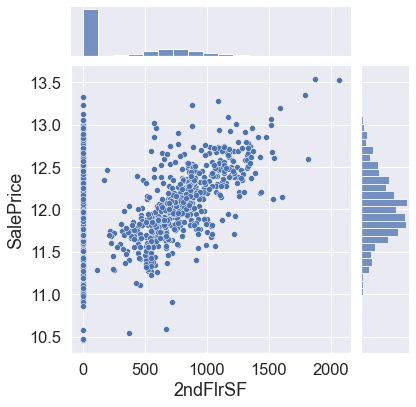

In [37]:
cols_with_outliers = ['GrLivArea','LotFrontage','LotArea','1stFlrSF','2ndFlrSF']
for feature in cols_with_outliers:
    sns.jointplot(x=feature, y='SalePrice', data=housing)
    plt.show()

### We can use BoxPlot as well to check outliers

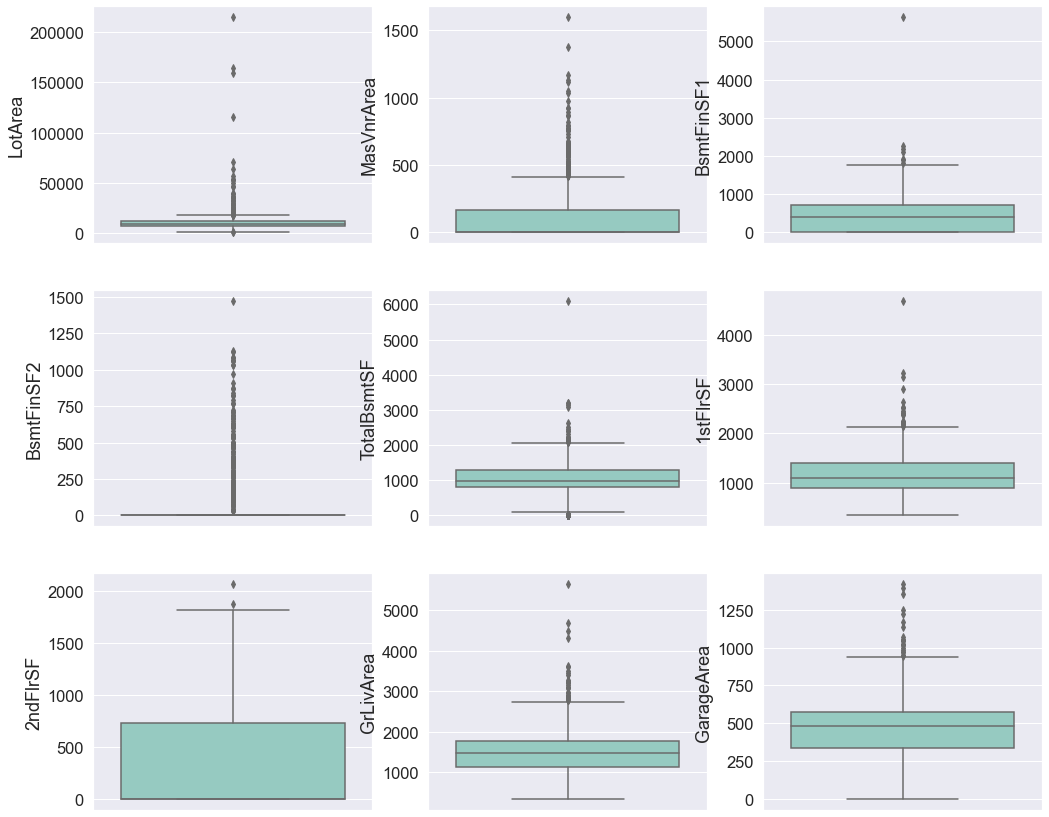

In [38]:
plt.figure(figsize=(17, 20))
plt.subplot(4,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = housing)
plt.subplot(4,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = housing)
plt.subplot(4,3,3)
sns.boxplot(y = 'BsmtFinSF1', palette='Set3', data = housing)
plt.subplot(4,3,4)
sns.boxplot(y = 'BsmtFinSF2', palette='Set3', data = housing)
plt.subplot(4,3,5)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = housing)
plt.subplot(4,3,6)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = housing)
plt.subplot(4,3,7)
sns.boxplot(y = '2ndFlrSF', palette='Set3', data = housing)
plt.subplot(4,3,8)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = housing)
plt.subplot(4,3,9)
sns.boxplot(y = 'GarageArea', palette='Set3', data = housing)
plt.show()

### As we have very less data so removing outlier from 'GrLivArea' only
   - Removing some outliers on lower right side of 'GrLivArea'
   
   
### Method to remove outliers.

In [39]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    val = q3 - q1
    lower_fence = (q1 - 1.5*val)
    upper_fence = (q3 + 1.5*val)
    out = x[(x[y]<upper_fence) & (x[y]>lower_fence)]
    return out

In [40]:
housing = remove_outliers(housing,'GrLivArea')

### Removed data = Total records - Remaining Records = 1460 - 1429 = 31

### Remaining Records we have : 1429

In [41]:
housing.shape

(1429, 69)

### Some more visualization on Categorical Features
  - Some of the Categorical Features having more data on single sub-category
  - Due to this, it might impact the signicficance of model
  - So we need to check how many features we have in this category
  - Find out those features and drop them

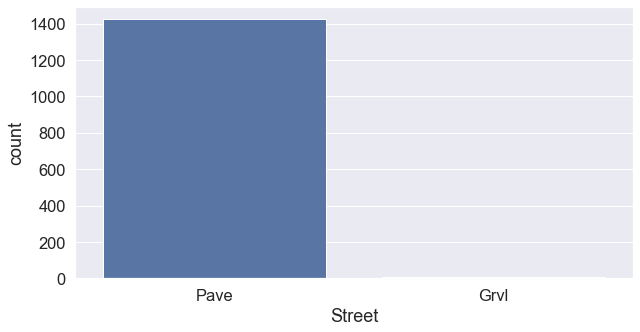

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Street', data = housing)
plt.show()

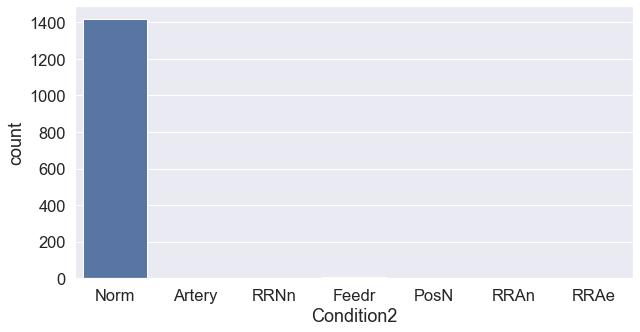

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Condition2', data = housing)
plt.show()

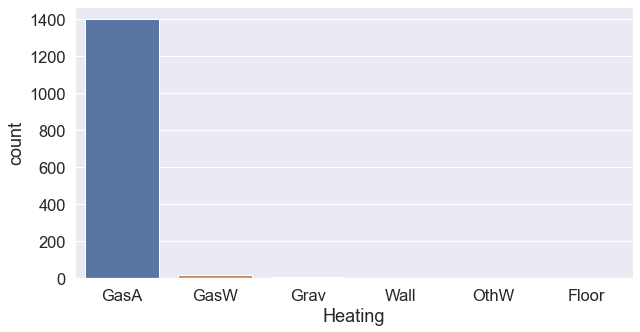

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Heating', data = housing)
plt.show()

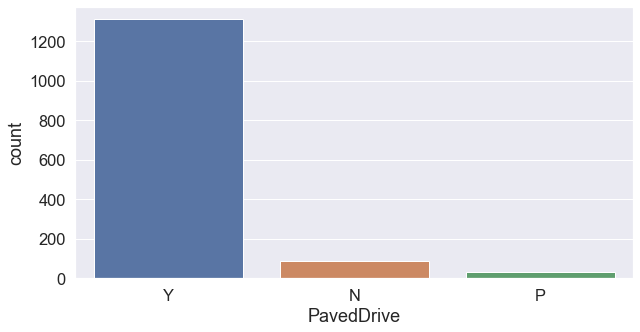

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x ='PavedDrive', data = housing)
plt.show()

In [46]:
def get_CatVar_with_highFreqCat():
    cols = []
    for feature in cat_features:
        if housing[feature].value_counts().max() >= (len(housing.index)/100)*90 :
            cols.append(feature)
    return cols

cat_cols_to_rem = get_CatVar_with_highFreqCat()
print(cat_cols_to_rem)
housing.drop(cat_cols_to_rem, axis=1, inplace=True)
housing.shape

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageCond', 'PavedDrive']


(1429, 57)

### Till now we have done Data understanding, cleaning, visualization.

### Check how many features remaining for each category :

In [47]:
types = housing.dtypes
numeric_type = types[(types == 'int64') | (types == float)] 
categorical_type = types[types == object]

In [48]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

int64      27
object     27
float64     3
Name: 0, dtype: int64

### Print Numeric and Categorical features seperately

In [49]:
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeOfProperty']


In [50]:
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']


# Step 3 : Data Preprocessing
 - Creating Dummy columns to convert categorical into numerical
 - Pandas has inbuilt **get_dummies()** method for this

### We have categorical features having each category with atleast 4 sub-cateagories, so we should decide the encoding method to encode these categorical features.

### We will use One-Hot Encoding method

In [51]:
housing = pd.get_dummies(housing, drop_first=True)
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeOfProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,12.247694,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,12.109011,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,12.317167,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [52]:
housing.shape

(1429, 187)

### Data Split for train and test

In [53]:
X = housing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [54]:
y = housing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Scaling for Predictor variables
  - As we have data at differenct scale which may affect the model
  - So better to bring all the features at one scale
  - Scaling is necessary before using Ridge or Lasso

In [55]:
cols_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
                 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 
                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                 'AgeOfProperty']
scaler = StandardScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOfProperty,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.076225,-0.205480,-0.191357,0.701469,-0.517421,0.579914,0.634065,-0.287357,-0.458393,-0.808832,1.270737,-0.106851,0.518594,1.114016,-0.240584,0.857558,1.245028,0.200506,-0.212055,-0.938716,0.383471,-0.746583,0.255254,-0.363313,-0.117612,-0.271111,-0.045633,0,-1.050301,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-0.863803,0.526766,-0.074428,-0.040499,2.204276,-0.576932,1.269046,-0.287357,0.542588,0.326546,-0.789258,-0.106851,-0.477469,-0.817937,3.952033,0.857558,-0.749529,0.200506,-0.212055,0.633881,-0.037041,1.664726,-0.720677,-0.363313,-0.117612,-0.271111,-0.045633,0,-0.183453,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

### After scaling we split our data into train and test dataset with 70-30 ratio

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=50)

# Step 4 : Model building and evaluation

### First try to build model using Linear Regression and RFE
  - For RFE we take 20 features

In [57]:
# Instantiate LinearRegression object
lm = LinearRegression()

# fit a line
lm.fit(X_train,y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

### Assign the columns selected/supported by RFE to cols

### Creating temporary dataframe to assign 20 features selected using RFE and view them

In [58]:
col = X_train.columns[rfe.support_]

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), 
                       columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,GrLivArea,True,1
2,MSZoning_FV,True,1
3,MSZoning_RH,True,1
4,MSZoning_RL,True,1
5,MSZoning_RM,True,1
6,Neighborhood_ClearCr,True,1
7,Neighborhood_Crawfor,True,1
8,HouseStyle_2.5Fin,True,1
9,Exterior1st_BrkComm,True,1


In [59]:
X_train_rfe = X_train[col]

In [60]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

### Find out the R2_score for train and test dataset after fit the linear regression model

In [61]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2_Score on Train data : ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_Score on Test data : ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Train data : ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test data : ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE on Train data : ',mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE on Test data : ',mse_test_lr)
metric.append(mse_test_lr)

R2_Score on Train data :  0.9386103858766208
R2_Score on Test data :  0.9038931401944666
RSS on Train data :  9.161940825664594
RSS on Test data :  5.896823265504657
MSE on Train data :  0.009161940825664594
MSE on Test data :  0.013745508777400132


In [62]:
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE on Train data : ',mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE on Test data : ',mse_test_lr)

MSE on Train data :  0.009161940825664594
MSE on Test data :  0.013745508777400132


### Since Test R2 score is lower than Train R2 score, we will check for some alternate methods of Regression:
  - Ridge Regression
  - Lasso Regression
  
### Lasso and Ridge Regression

Let's now try predicting house prices and perform lasso and ridge regression.

### 1. Ridge Regression

In [63]:
X_train.shape

(1000, 186)

In [64]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5

ridge_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,
                       return_train_score=True,verbose=1)
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
ridge_cv_res = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_res = ridge_cv_res[ridge_cv_res['param_alpha']<=500]
ridge_cv_res[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values(by='rank_test_score')

,param_alpha,mean_train_score,mean_test_score,rank_test_score
19,7.0,-0.069938,-0.082469,1
20,8.0,-0.070264,-0.082474,2
21,9.0,-0.070571,-0.082481,3
18,6.0,-0.069583,-0.082488,4
22,10.0,-0.070860,-0.082504,5
17,5.0,-0.069180,-0.082543,6
16,4.0,-0.068725,-0.082676,7
23,20,-0.073100,-0.082940,8
15,3.0,-0.068221,-0.082944,9
14,2.0,-0.067611,-0.083417,10


### Plotting mean test and train scoes with param_alpha and get the best estimator for lambda.

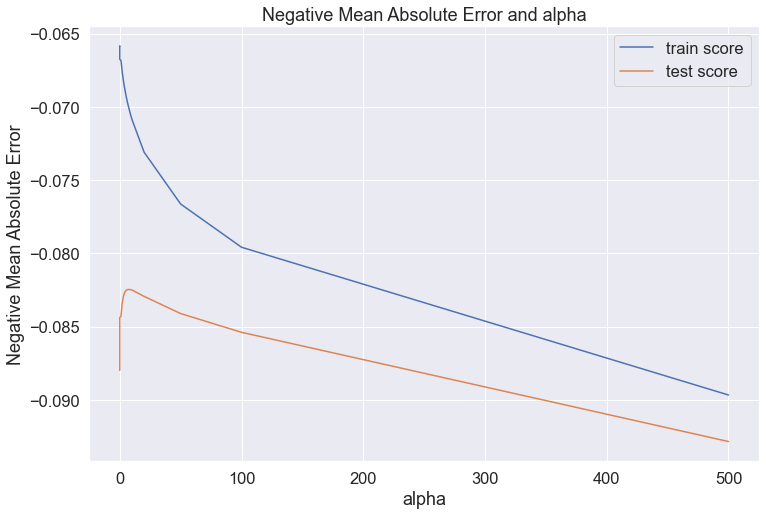

In [66]:
ridge_cv_res['param_alpha'] = ridge_cv_res['param_alpha'].astype('int32')

plt.plot(ridge_cv_res['param_alpha'], ridge_cv_res['mean_train_score'])
plt.plot(ridge_cv_res['param_alpha'], ridge_cv_res['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [67]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 7.0}
-0.08246908194122538


### Now using best_params_ { 'alpha' : 7.0 } check the coefficient values.

In [68]:
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.68069073e-02,  1.16534392e-02,  1.96373319e-02,  7.14466013e-02,
        5.45227914e-02, -3.28436937e-05,  3.15234836e-02,  8.67269355e-03,
        3.60009387e-02,  4.20139103e-02,  4.62118527e-02,  3.22535813e-03,
        7.62878593e-02,  1.24978483e-02, -9.73205299e-04,  1.02589457e-02,
        1.26389228e-02, -3.85478222e-04, -8.37070262e-03,  1.01225714e-02,
        2.37686763e-02,  1.40523503e-02, -2.93504243e-03,  1.17069287e-02,
        5.62354108e-03,  1.37877090e-02,  9.06883312e-03, -3.20726816e-06,
       -7.74270715e-02,  7.13129991e-02,  3.72682497e-02,  6.76446647e-02,
        3.04558418e-02,  1.53477835e-03, -1.68841456e-02, -2.06761659e-03,
        1.88732029e-02, -8.74326518e-03, -2.05010559e-02, -2.21181262e-02,
       -4.40457966e-03, -1.09361345e-02,  2.01179582e-02,  3.09407148e-02,
       -8.54005220e-03,  1.05942177e-01, -4.26553720e-02, -1.14159577e-02,
       -7.65428350e-02, -6.46976882e-02, -3.25618731e-02, -8.71901947e-03,
        1.79759801e-02, -

In [69]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.816),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.012),
 ('LotArea', 0.02),
 ('OverallQual', 0.071),
 ('OverallCond', 0.055),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.009),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.042),
 ('2ndFlrSF', 0.046),
 ('LowQualFinSF', 0.003),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.01),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.024),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.009),
 ('MiscVal', -0.0),
 ('AgeOfProperty', -0.077),
 ('MSZoning_FV', 0.071),
 ('MSZoning_RH', 0.037),
 ('MSZoning_RL', 0.068),
 ('MSZoning_RM', 0.03),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.017),
 ('LotShape_Reg', -0.002),
 ('LotConfig_CulDSac', 0.019),
 ('LotConfig_FR2', -0.009),
 ('LotConfig_FR3', -0.021),
 ('LotConfig

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2_Score on Train data : ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_Score on Test data : ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Train data : ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test data : ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE on Train data : ',mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE on Test data : ',mse_test_lr)
metric2.append(mse_test_lr)

R2_Score on Train data :  0.9314057178248342
R2_Score on Test data :  0.9134170549147
RSS on Train data :  10.237183654628502
RSS on Test data :  5.312464958359958
MSE on Train data :  0.010237183654628503
MSE on Test data :  0.012383368201305263


In [71]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

### Sorting the coefficients in ascending order

In [72]:
param_RFE = pd.DataFrame(mod_ridge)
param_RFE.columns = ['Variable', 'Coeff']
res=param_RFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.816
46,Neighborhood_Crawfor,0.106
13,GrLivArea,0.076
4,OverallQual,0.071
30,MSZoning_FV,0.071
62,Neighborhood_StoneBr,0.068
32,MSZoning_RL,0.068
186,SaleCondition_Partial,0.068
185,SaleCondition_Normal,0.066
66,Condition1_Norm,0.056


In [73]:
param_RFE.shape

(187, 2)

### 2. Lasso Regression

In [74]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation

folds = 5
lasso_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = lasso_cv_results[lasso_cv_results['param_alpha']<=1]
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 
                  'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.001,-0.076179,-0.083612,1
0,0.0001,-0.067099,-0.083615,2
2,0.01,-0.090293,-0.092646,3
3,0.05,-0.118642,-0.120206,4
4,0.1,-0.154589,-0.155516,5
5,0.2,-0.229875,-0.230545,6
6,0.3,-0.296067,-0.296734,7
7,0.4,-0.302605,-0.303174,8
8,0.5,-0.302605,-0.303186,23
13,1.0,-0.302618,-0.303197,24


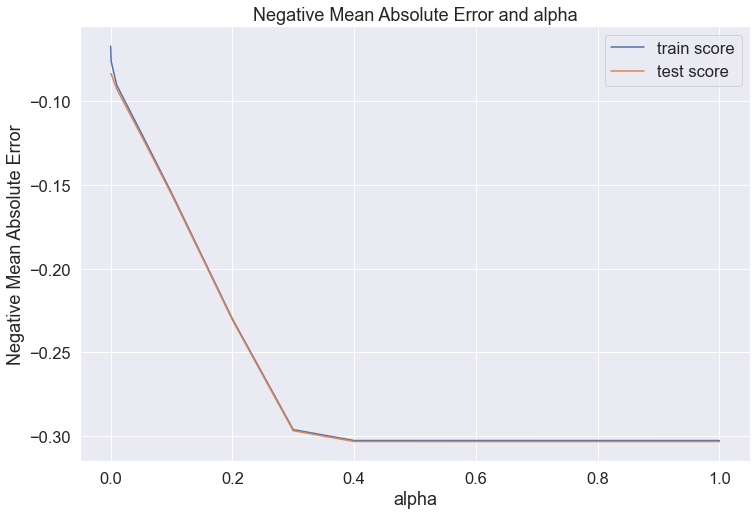

In [76]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stablizes thereafter

In [77]:
# get the best estimator for lambda

print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08361161527008407


### But we will use best_params_ { 'alpha' : 0.001 } check the coefficient values.

In [78]:
# check the coefficient values with lambda = 0.001

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2_Score on Train data : ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2_Score on Test data : ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS on Train data : ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS on Test data : ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE on Train data : ',mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE on Test data : ',mse_test_lr)
metric3.append(mse_test_lr)

R2_Score on Train data :  0.9198580787264283
R2_Score on Test data :  0.9130827227751112
RSS on Train data :  11.960582434804792
RSS on Test data :  5.332978556901442
MSE on Train data :  0.011960582434804792
MSE on Test data :  0.01243118544732271


In [80]:
# lasso model parameters

lasso_params = list(lasso.coef_ )
lasso_params.insert(0, lasso.intercept_)
lasso_params = [round(x, 3) for x in lasso_params]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, lasso_params))

[('constant', 11.847),
 ('MSSubClass', -0.011),
 ('LotFrontage', 0.012),
 ('LotArea', 0.019),
 ('OverallQual', 0.085),
 ('OverallCond', 0.058),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.036),
 ('BsmtFinSF2', 0.005),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.003),
 ('GrLivArea', 0.129),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.005),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', -0.003),
 ('KitchenAbvGr', -0.009),
 ('Fireplaces', 0.012),
 ('GarageArea', 0.031),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 0.009),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.013),
 ('PoolArea', 0.008),
 ('MiscVal', -0.0),
 ('AgeOfProperty', -0.086),
 ('MSZoning_FV', 0.047),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.049),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.003),
 ('LotConfig_CulDSac', 0.002),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -

In [81]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, lasso_params))

In [82]:
lasso_df = pd.DataFrame(mod)
lasso_df.columns = ['Variable', 'Coeff']

In [83]:
# sort the coefficients in ascending order
lasso_df = lasso_df.sort_values((['Coeff']), axis = 0, ascending = False)
lasso_df = pd.DataFrame(lasso_df[(lasso_df['Coeff'] != 0)])
lasso_df

,Variable,Coeff
0,constant,11.847
13,GrLivArea,0.129
186,SaleCondition_Partial,0.112
46,Neighborhood_Crawfor,0.097
4,OverallQual,0.085
5,OverallCond,0.058
185,SaleCondition_Normal,0.058
32,MSZoning_RL,0.049
30,MSZoning_FV,0.047
66,Condition1_Norm,0.044


In [84]:
lasso_df.shape

(65, 2)

### Selected features after shrinking insignificant features by Lasso

In [85]:
lasso_sel_features = list(lasso_df['Variable'])
lasso_sel_features

['constant',
 'GrLivArea',
 'SaleCondition_Partial',
 'Neighborhood_Crawfor',
 'OverallQual',
 'OverallCond',
 'SaleCondition_Normal',
 'MSZoning_RL',
 'MSZoning_FV',
 'Condition1_Norm',
 'Foundation_PConc',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'Exterior1st_BrkFace',
 'GarageArea',
 'BsmtExposure_Gd',
 'Neighborhood_StoneBr',
 'Exterior1st_MetalSd',
 'FireplaceQu_Gd',
 'Neighborhood_BrkSide',
 'LotArea',
 'GarageType_Attchd',
 'ExterCond_TA',
 'MasVnrType_Stone',
 'WoodDeckSF',
 'BsmtFullBath',
 'ScreenPorch',
 'Fireplaces',
 'GarageType_Detchd',
 'LotFrontage',
 'BsmtFinType1_BLQ',
 'GarageQual_TA',
 'Neighborhood_Somerst',
 'EnclosedPorch',
 'HalfBath',
 'PoolArea',
 'Neighborhood_NridgHt',
 'FullBath',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtFinType1_GLQ',
 'LotConfig_CulDSac',
 'MasVnrArea',
 'HeatingQC_Gd',
 'BsmtQual_Gd',
 'Exterior1st_HdBoard',
 'RoofStyle_Hip',
 'Exterior1st_Wd Sdng',
 'LotShape_Reg',
 'LowQualFinSF',
 'BedroomAbvGr',
 'Neighborhood_Mitchel',
 'BsmtFinType1_Rec',
 'BsmtQ

### Creating a table which contain all the metrics for Comparison

In [86]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.938610,0.931406,0.919858
1,R2 Score (Test),0.903893,0.913417,0.913083
2,RSS (Train),9.161941,10.237184,11.960582
3,RSS (Test),5.896823,5.312465,5.332979
4,MSE (Train),0.009162,0.010237,0.011961
5,MSE (Test),0.013746,0.012383,0.012431


# Step 5 : Observation and Inference
------------------------------

  - **R2_score and Mean Squared Error for Ridge and Lasso** :
      - **Ridge Regression** 
          - R2 score [Train Data] :  0.931406
          - R2 score [Test Data] : 0.913417
          - Mean Squared Error [Test Data]: 0.012383
      - **Lasso Regression**
          - R2 score [Train Data] :  0.919858
          - R2 score [Test Data] : 0.913083
          - Mean Squared Error [Test Data]: 0.012431
      - **Though model performance by Ridge Regression is better than Lasso in terms of R2 Score and MSE, but better to use Lasso Regression as it also helps us in Feature Selection by shrinking most of the insignificant features to 0.**
      - **As it is always advisable to use simple yet robust model.**
   
   - **Optimal value of Alpha/Lambda for Ridge and Lasso** :
      - Ridge (**Alpha = 7.0**)
      - Lasso (**Alpha = 0.001**)
      
   - **Equation formed by features and coefficients obtained by Lasso** 

In [87]:
## Assigns features to x1,x2,x3,x4,........,x64
lasso_df.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 
                                       'x12', 'x13', 'x14', 'x15', 'x16','x17','x18','x19','x20','x21','x22','x23',
                                       'x24','x25', 'x26', 'x27', 'x28','x29','x30','x31','x32','x33','x34','x35',
                                       'x36','x37', 'x38', 'x39', 'x40','x41','x42','x43','x44','x45','x46','x47',
                                       'x48','x49', 'x50', 'x51', 'x52','x53','x54','x55','x56','x57','x58','x59',
                                       'x60','x61', 'x62', 'x63', 'x64']), inplace = True) 
lasso_df

,Variable,Coeff
C,constant,11.847
x1,GrLivArea,0.129
x2,SaleCondition_Partial,0.112
x3,Neighborhood_Crawfor,0.097
x4,OverallQual,0.085
x5,OverallCond,0.058
x6,SaleCondition_Normal,0.058
x7,MSZoning_RL,0.049
x8,MSZoning_FV,0.047
x9,Condition1_Norm,0.044


## INFERENCE :
-------------------

### As a suggestion Surprise Housing company keep checking those predictors affecting the house sale price.

### Higher value of Positive Coefficient, helps for high Sale Price.

### Some of the features are below :

|**Feature**|**Description**|
|---|---|
|GrLivArea|Above grade (ground) living area square feet|
|SaleCondition(Partial)|Home was not completed when last assessed (associated with New Homes)|
|Neighborhood(Crawfor)|Physical locations within Ames city limits (CrawFord)|
|OverallQual|Rates the overall material and finish of the house|
|OverallCond|Rates the overall condition of the house|

### Higher value of Negative Coefficient, suggests dip in Sale Price

### Some of the features are below :

|**Feature**|**Description**|
|---|---|
|AgeOfProperty|Age of property at the time of Selling|
|Neighborhood(IDOTRR)|Physical locations within Ames city limits(Iowa DOT and Rail Road)|
|HeatingQC(TA)|Heating quality and condition(Average/Typical)|
|KitchenQual(TA)|Kitchen quality(Average/Typical)|
|BldgType(Twnhs)|Type of dwelling(Townhouse Inside and End Unit)|


# THANK YOU

## Question 1 :

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [88]:
# optimum values of alpha for ridge and lasso regression is:
# best parameter
print('Lasso : ',lasso_cv.best_params_)
print('Ridge : ',ridge_cv.best_params_)

Lasso :  {'alpha': 0.001}
Ridge :  {'alpha': 7.0}


In [89]:
## Ridge Regression :
alpha = 14.0
ridge_dou = Ridge(alpha=alpha)
ridge_dou.fit(X_train,y_train)

# predicting for train and test data
y_pred_train = ridge_dou.predict(X_train)
y_pred_test = ridge_dou.predict(X_test)

print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test))))

On Train Dataset
r2_score on train data: 0.9282
mean squared error for train data: 0.0107
rss for train data: 11
**************************************************
On Test Dataset
r2_score on test data: 0.9145
mean squared error for test data: 0.0122
rss for test data: 5


In [90]:
## Lasso Regression
alpha = 0.002
lasso_dou = Lasso(alpha=alpha)
lasso_dou.fit(X_train,y_train)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_la = lasso_dou.predict(X_train)
y_pred_test_la = lasso_dou.predict(X_test)

print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train_la),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train_la),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train_la))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test_la),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test_la),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test_la))))

On Train Dataset
r2_score on train data: 0.9118
mean squared error for train data: 0.0132
rss for train data: 13
**************************************************
On Test Dataset
r2_score on test data: 0.9102
mean squared error for test data: 0.0128
rss for test data: 6


In [91]:
# creating dataframe with the coefficients
coeff_double = pd.DataFrame(index= X_train.columns)
coeff_double['ridge_coeff_double'] = ridge_dou.coef_
coeff_double['lasso_coeff_double'] = lasso_dou.coef_
coeff_double.sort_values(ascending=False, by=['lasso_coeff_double','ridge_coeff_double']).head()

,ridge_coeff_double,lasso_coeff_double
GrLivArea,0.074944,0.128101
OverallQual,0.074685,0.093489
SaleCondition_Partial,0.056171,0.082568
Neighborhood_Crawfor,0.088234,0.070798
OverallCond,0.055847,0.056892


## Question 3 :

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [92]:
# top 5 variables in given model
top5 = ['GrLivArea', 'OverallQual', 'SaleCondition_Partial', 'Neighborhood_Crawfor', 'OverallCond']

# Dropping 5 variables
X_train_5 = X_train.drop(top5, axis = 1)
X_test_5 =  X_test.drop(top5, axis = 1)

In [93]:
X_train_5.shape

(1000, 181)

In [94]:
lasso_mod = Lasso()

# taking out the parameters lambda function
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1, 5.0, 10.0, 
                    50, 100, 500 ]}

folds = 5

# Adopting cross_validation using 5 fold  

lasso_top5 = GridSearchCV(estimator= lasso_mod,
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score= True,
                        verbose= 1)

lasso_top5.fit(X_train_5,y_train)

lasso_top5.best_params_

Fitting 5 folds for each of 19 candidates, totalling 95 fits


{'alpha': 0.0001}

In [95]:
# fitting the lasso model with alpha = 0.0001

alpha = 0.0001

lasso_mod = Lasso(alpha = alpha)

lasso_mod.fit(X_train_5, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_la = lasso_mod.predict(X_train_5)
y_pred_test_la = lasso_mod.predict(X_test_5)

In [96]:
print("On Train Dataset")
print('r2_score on train data:', round(r2_score(y_train, y_pred_train_la),4))
print('mean squared error for train data:', round(mean_squared_error(y_train, y_pred_train_la),4))
print('rss for train data:', round(np.sum(np.square(y_train - y_pred_train_la))))
print('*'*50)
print("On Test Dataset")
print('r2_score on test data:', round(r2_score(y_test, y_pred_test_la),4))
print('mean squared error for test data:', round(mean_squared_error(y_test, y_pred_test_la),4))
print('rss for test data:', round(np.sum(np.square(y_test - y_pred_test_la))))

On Train Dataset
r2_score on train data: 0.9214
mean squared error for train data: 0.0117
rss for train data: 12
**************************************************
On Test Dataset
r2_score on test data: 0.8893
mean squared error for test data: 0.0158
rss for test data: 7


In [97]:
# Checking for the coefficient of variables
# creating dataframe with the coefficients
coeff_top5 = pd.DataFrame(index= X_train_5.columns)
coeff_top5 ['lasso_top5'] = lasso_mod.coef_
coeff_top5.sort_values(ascending=False, by=['lasso_top5']).head()

,lasso_top5
MSZoning_RH,0.320465
MSZoning_FV,0.319124
MSZoning_RL,0.298707
MSZoning_RM,0.294968
2ndFlrSF,0.132305
